In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
steel_df = pd.read_excel("aluminum6061.xls")
al_df = pd.read_excel("steel1045.xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [3]:
strain_al_plastic = al_df['CH5']*0.01
strain_al_elastic = al_df['EXT']*0.01
d_al = 0.506
stress_al = (al_df['FORCE']*0.001)/(np.pi*((d_al/2)**2))

strain_steel_plastic = steel_df['CH5']*0.01
strain_steel_elastic = steel_df['EXT']*0.01
d_steel = 0.506
stress_steel = (steel_df['FORCE']*0.001)/(np.pi*((d_steel/2)**2))

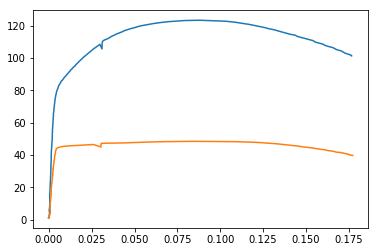

In [4]:
fig, ax1 = plt.subplots()
ax1.plot(strain_al_plastic,stress_al,strain_steel_plastic,stress_steel)
plt.show()

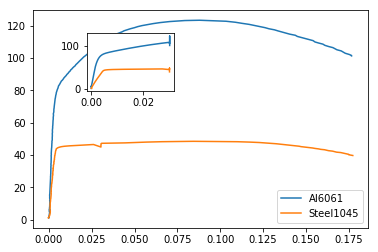

In [8]:
fig, ax1 = plt.subplots()
ax1.plot(strain_al_plastic,stress_al,strain_steel_plastic,stress_steel)
ax1.legend(['Al6061','Steel1045'])
left, bottom, width, height = [0.25, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(strain_al_elastic,stress_al,strain_steel_elastic, stress_steel)

plt.show()